In [ ]:
#Only run it with CUDA on Google Colab!
#For first run, pls install lazypredict below!
#!pip install lazypredict

In [ ]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load datatables
!pip install download
from download import download

#dropbox drive
bedt_path = download("https://www.dropbox.com/s/8l115h004d6cd91/babushkin_et_dt.csv?dl=0","babushkin_et_dt.csv", replace=True)
ibmhdt_path = download("https://www.dropbox.com/s/npdsmt3uuiz6ab2/ibm_hra_dt.csv?dl=0","ibm_hra_dt.csv", replace=True)
hradt_path = download("https://www.dropbox.com/s/mo8e0n0wnmg1kzm/hra_dt.csv?dl=0","hra_dt.csv", replace=True)

#cuda drive
bedt_df = pd.read_csv("babushkin_et_dt.csv", sep=";")
ibmhdt_df = pd.read_csv("ibm_hra_dt.csv", sep=";")
hradt_df = pd.read_csv("hra_dt.csv", sep=";")

Successfully downloaded file to babushkin_et_dt.csv
Successfully downloaded file to ibm_hra_dt.csv
Successfully downloaded file to hra_dt.csv


#Babushkin et dt

In [ ]:
#View the data
bedt_df.head()

stag gender   age         industry  profession      traffic coach  \
0   7.030801      m  35.0            Banks          HR  rabrecNErab    no   
1  22.965092      m  33.0            Banks          HR        empjs    no   
2  15.934292      f  35.0  PowerGeneration          HR  rabrecNErab    no   
3  15.934292      f  35.0  PowerGeneration          HR  rabrecNErab    no   
4   8.410678      m  32.0           Retail  Commercial        youjs   yes   

  head_gender greywage  way  extraversion  independ  selfcontrol  anxiety  \
0           f    white  bus           6.2       4.1          5.7      7.1   
1           m    white  bus           6.2       4.1          5.7      7.1   
2           m    white  bus           6.2       6.2          2.6      4.8   
3           m    white  bus           5.4       7.6          4.9      2.5   
4           f    white  bus           3.0       4.1          8.0      7.1   

   novator  event  
0      8.3      1  
1      8.3      1  
2      8.3      1  
3      6.7      1  
4      3.7      1

In [ ]:
#Checking datatypes
bedt_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1116 non-null   float64
 1   gender        1116 non-null   object 
 2   age           1116 non-null   float64
 3   industry      1116 non-null   object 
 4   profession    1116 non-null   object 
 5   traffic       1116 non-null   object 
 6   coach         1116 non-null   object 
 7   head_gender   1116 non-null   object 
 8   greywage      1116 non-null   object 
 9   way           1116 non-null   object 
 10  extraversion  1116 non-null   float64
 11  independ      1116 non-null   float64
 12  selfcontrol   1116 non-null   float64
 13  anxiety       1116 non-null   float64
 14  novator       1116 non-null   float64
 15  event         1116 non-null   int64  
dtypes: float64(7), int64(1), object(8)
memory usage: 139.6+ KB


In [ ]:
#Checking descriptive statistics
bedt_df.describe()

stag          age  extraversion     independ  selfcontrol  \
count  1116.000000  1116.000000   1116.000000  1116.000000  1116.000000   
mean     36.701802    31.024734      5.589606     5.474462     5.607527   
std      34.173048     6.973078      1.857401     1.702149     1.985720   
min       0.394251    18.000000      1.000000     1.000000     1.000000   
25%      11.720739    26.000000      4.600000     4.100000     4.100000   
50%      24.443532    30.000000      5.400000     5.500000     5.700000   
75%      51.622177    36.000000      7.000000     6.900000     7.200000   
max     179.449692    58.000000     10.000000    10.000000    10.000000   

           anxiety      novator        event  
count  1116.000000  1116.000000  1116.000000  
mean      5.666667     5.877330     0.501792  
std       1.711035     1.903534     0.500221  
min       1.700000     1.000000     0.000000  
25%       4.800000     4.400000     0.000000  
50%       5.600000     6.000000     1.000000  
75%       7.100000     7.500000     1.000000  
max      10.000000    10.000000     1.000000

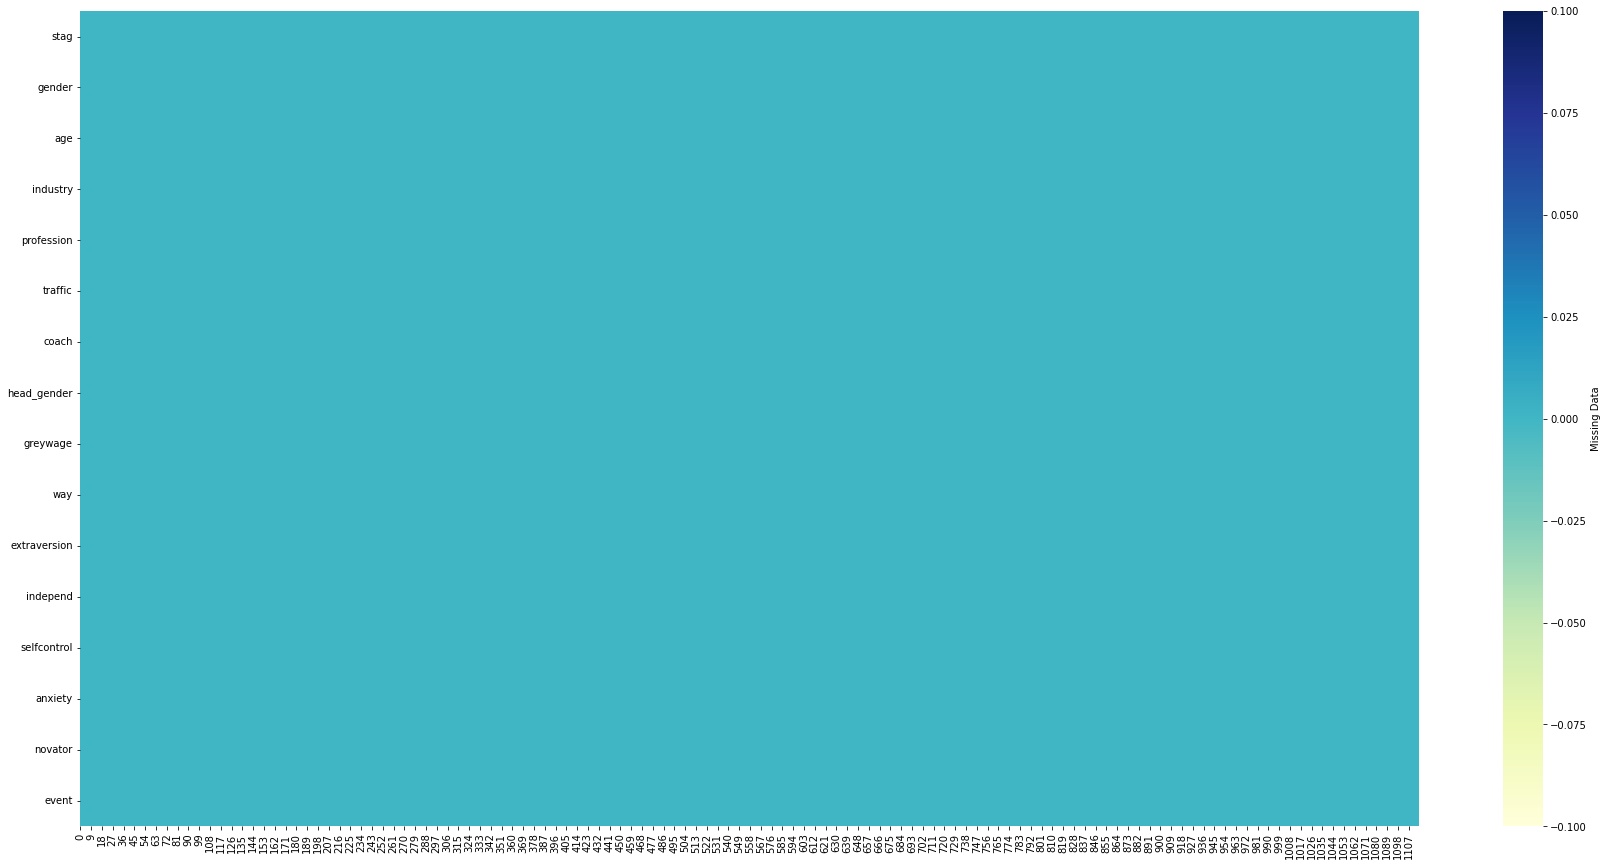

In [ ]:
#Checking missing values
plt.figure(figsize=(30,15))
sns.heatmap(bedt_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [ ]:
#Missing data imputation - Not needed here (see above MD graph -> 0 missing data)

In [ ]:
#Separating differently encoded variables
float_features_b = bedt_df.loc[:, ["stag", "age", "extraversion","independ","selfcontrol", "anxiety", "novator"]] #float
dummy_features_b = bedt_df.loc[:, ["gender", "head_gender", "greywage", "way", "coach", "traffic", "industry", "profession"]] #dummy
target_variable_b = bedt_df.loc[:, ["event"]] #target variable
target_variable_b = target_variable_b.replace({"event": {1: 0, 0: 1}})

In [ ]:
#Encoding features

dummy_features_b = pd.concat([pd.get_dummies(dummy_features_b['gender'], prefix='gender').iloc[:,0], pd.get_dummies(dummy_features_b['head_gender'], prefix='head_gender').iloc[:,0], pd.get_dummies(dummy_features_b['greywage'], prefix='greywage').iloc[:,0], pd.get_dummies(dummy_features_b['way'], prefix='way').iloc[:,0:2], pd.get_dummies(dummy_features_b['coach'], prefix='coach').iloc[:,0:2], pd.get_dummies(dummy_features_b['traffic'], prefix='traffic').iloc[:,0:7], pd.get_dummies(dummy_features_b['industry'], prefix='industry').iloc[:,0:15], pd.get_dummies(dummy_features_b['profession'], prefix='profession').iloc[:,0:14]], axis=1)

In [ ]:
#Concat all subdfs into 1 !!!

concated_df_b = pd.concat([float_features_b, dummy_features_b, target_variable_b], axis=1)

In [ ]:
#Checking data distributions
import seaborn as sns

sns.pairplot(concated_df_b)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Target imbalance description:
concated_df_b["event"].value_counts()/concated_df_b["event"].count()

0    0.501792
1    0.498208
Name: event, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap of B')

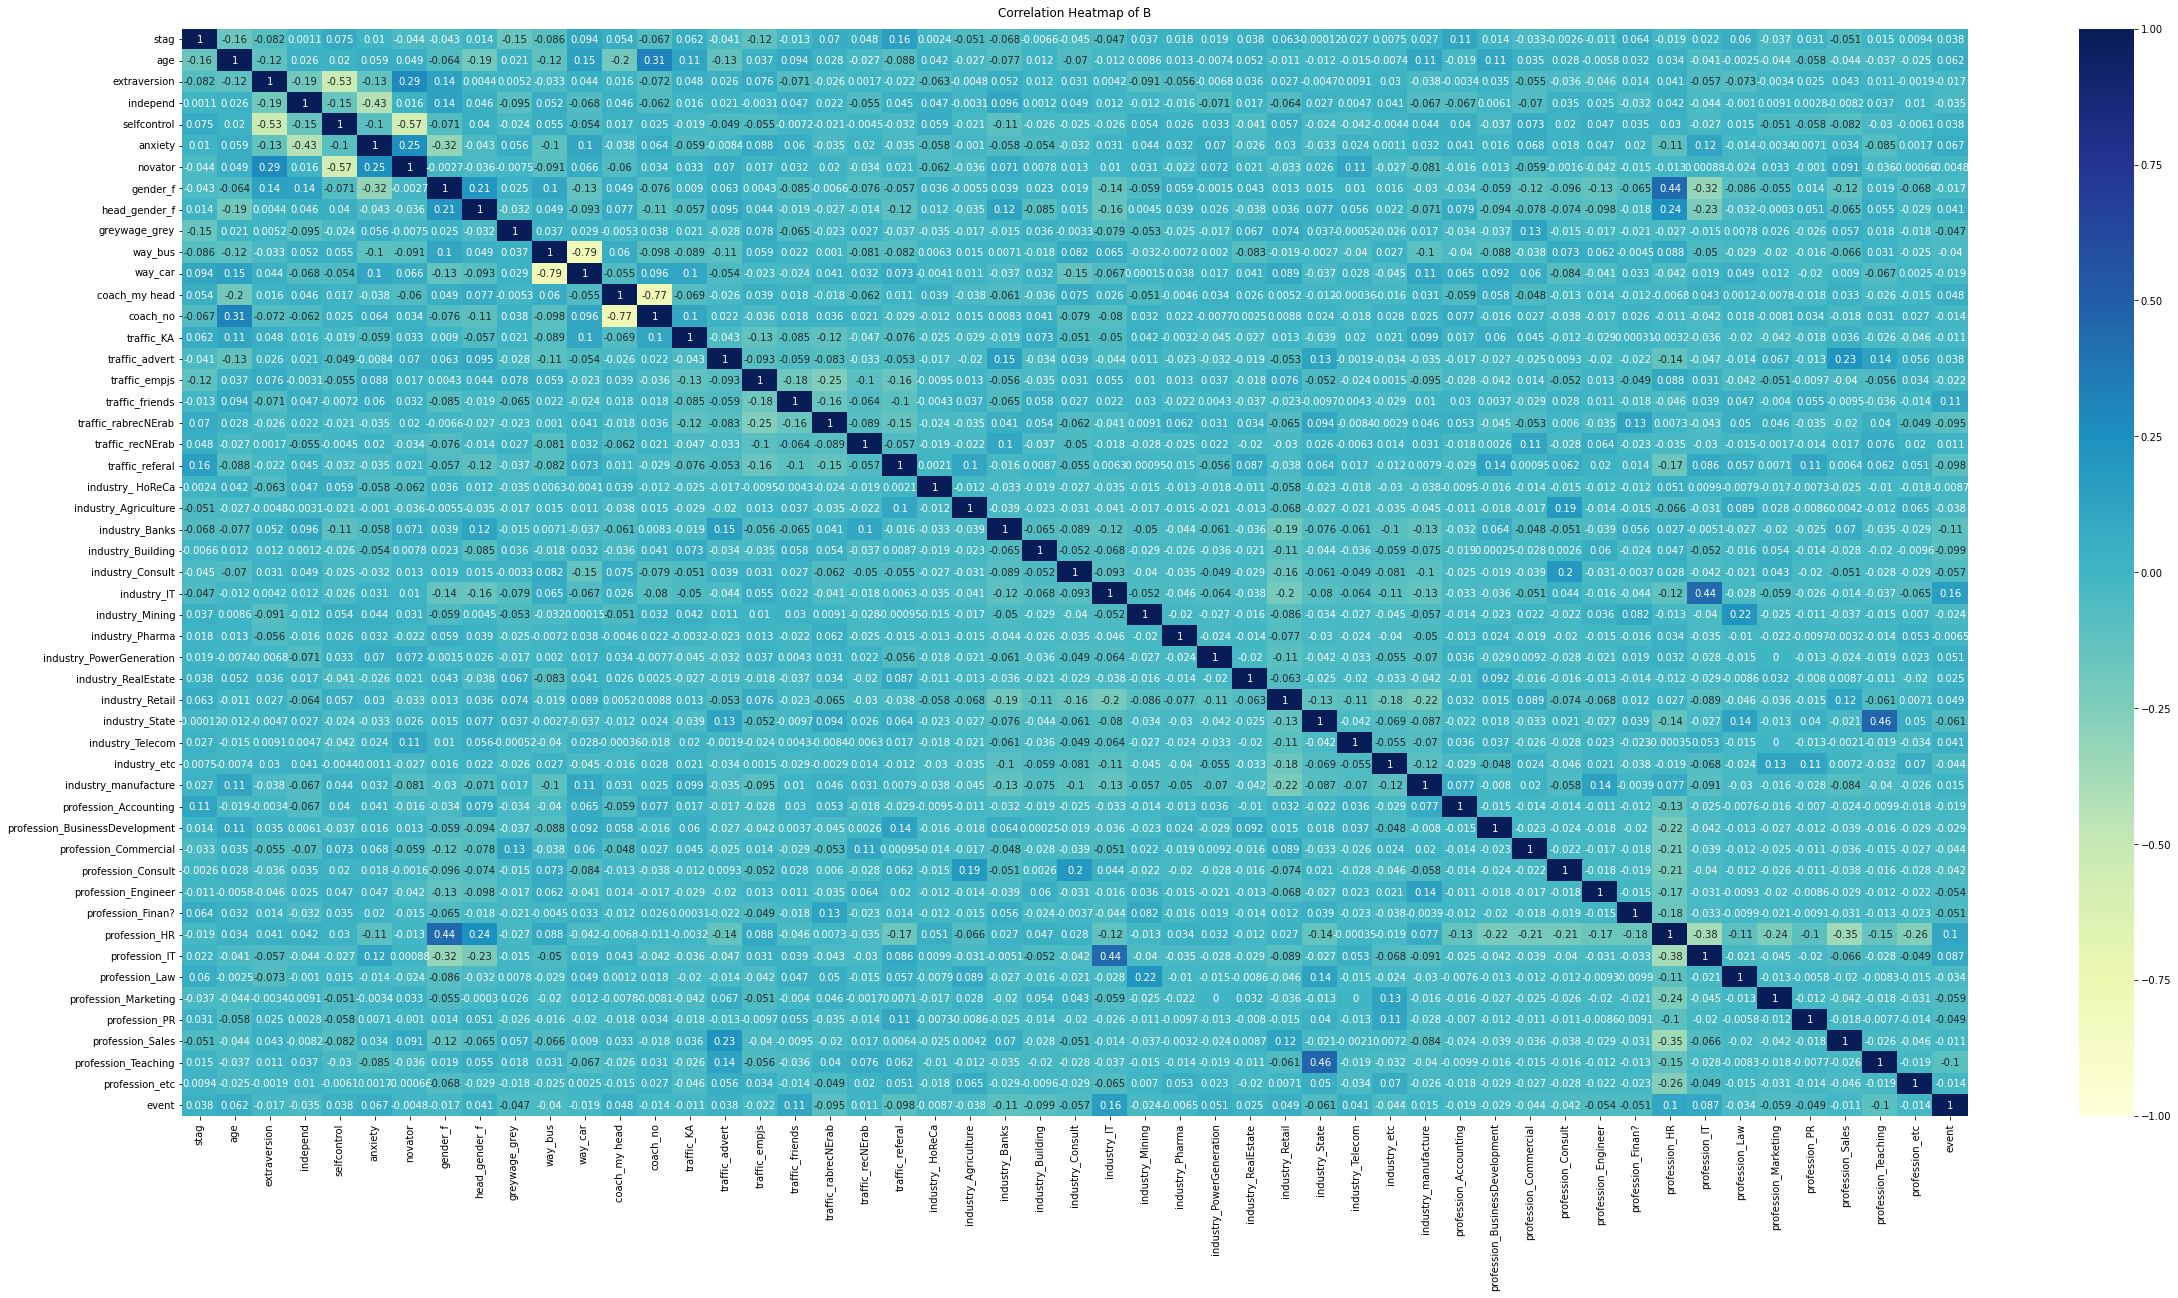

In [ ]:
#Checking correlation of data
#Source: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))

heatmap_b = sns.heatmap(concated_df_b.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

heatmap_b.set_title('Correlation Heatmap of B', fontdict={'fontsize':12}, pad=12)

In [ ]:
#Log scaling not normal feature data distributions !!!

import numpy as np

concated_df_b.loc[:,["stag", "age"]]+=1
concated_log_df_b = np.log(concated_df_b.loc[:,["stag", "age"]])
concated_df_b = concated_df_b.drop(["stag", "age"], axis = 1)

In [ ]:
#Splitting data and Standardizing features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

concated_df_b = pd.concat([concated_log_df_b, concated_df_b], axis=1)
X_b = concated_df_b.iloc[:,:-1]
y_b = concated_df_b.iloc[:,-1]

X_train_b, X_valid_b, y_train_b, y_valid_b = train_test_split(X_b, y_b, test_size=0.33, random_state=0)

In [ ]:
#Preparing data for lazyprediction - (0.33 valid and 0.67 train)

#!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_b, X_valid_b, y_train_b, y_valid_b)

print(models)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [00:02<00:00, 12.30it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.72               0.72     0.72      0.72   
RandomForestClassifier             0.71               0.72     0.72      0.71   
XGBClassifier                      0.70               0.70     0.70      0.70   
LGBMClassifier                     0.69               0.69     0.69      0.69   
LabelSpreading                     0.68               0.68     0.68      0.68   
LabelPropagation                   0.68               0.68     0.68      0.68   
BaggingClassifier                  0.66               0.67     0.67      0.66   
LinearSVC                          0.66               0.66     0.66      0.66   
NuSVC                              0.66               0.66     0.66      0.66   
LinearDiscriminantAnalysis         0.66               0.66     0.66      0.66   
RidgeClassifier             

In [ ]:
###Installing libraries
!pip install pytorch_tabnet

###Importing libraries and setting seed
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import json
import os


np.random.seed(0)

In [ ]:
###Training the model for clf (Tabnet) object, Source: https://github.com/dreamquark-ai/tabnet

from pytorch_tabnet.metrics import Metric
from sklearn.metrics import f1_score

class F1_score(Metric):
    def __init__(self):
        self._name = "f1_score"
        self._maximize = True

    def __call__(self, y_true, y_score):
        y_score = np.where(y_score > 0.5, 1, 0)
        y_score = y_score[:,1]
        return f1_score(y_true, y_score, average="weighted")

n_total_train = len(X_b)

train_indices, valid_indices = train_test_split(range(n_total_train), test_size=0.33, random_state=0)


clf = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    cat_emb_dim=1,
    lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

X_train_b_tb = X_b.values[train_indices]
y_train_b_tb = y_b.values[train_indices]

X_valid_b_tb = X_b.values[valid_indices]
y_valid_b_tb = y_b.values[valid_indices]

sc = StandardScaler()
X_train_b_tb = sc.fit_transform(X_train_b_tb)
X_valid_b_tb = sc.transform(X_valid_b_tb)

max_epochs = 100

clf.fit(
    X_train=X_train_b_tb, y_train=y_train_b_tb,
    eval_set=[(X_train_b_tb, y_train_b_tb), (X_valid_b_tb, y_valid_b_tb)],
    eval_name=['train', 'valid'],
    eval_metric=[F1_score],
    max_epochs=max_epochs, patience=100,
    batch_size=64, virtual_batch_size=64
)

Device used : cuda
epoch 0  | loss: 1.27474 | train_f1_score: 0.48689 | valid_f1_score: 0.42831 |  0:00:00s
epoch 1  | loss: 0.96342 | train_f1_score: 0.55056 | valid_f1_score: 0.54734 |  0:00:01s
epoch 2  | loss: 0.812   | train_f1_score: 0.39283 | valid_f1_score: 0.36084 |  0:00:02s
epoch 3  | loss: 0.90254 | train_f1_score: 0.46139 | valid_f1_score: 0.38015 |  0:00:02s
epoch 4  | loss: 0.73515 | train_f1_score: 0.51661 | valid_f1_score: 0.48252 |  0:00:03s
epoch 5  | loss: 0.69494 | train_f1_score: 0.53858 | valid_f1_score: 0.517   |  0:00:03s
epoch 6  | loss: 0.70114 | train_f1_score: 0.5557  | valid_f1_score: 0.58318 |  0:00:04s
epoch 7  | loss: 0.70148 | train_f1_score: 0.58812 | valid_f1_score: 0.49692 |  0:00:05s
epoch 8  | loss: 0.70873 | train_f1_score: 0.5312  | valid_f1_score: 0.50912 |  0:00:05s
epoch 9  | loss: 0.70568 | train_f1_score: 0.54194 | valid_f1_score: 0.48964 |  0:00:06s
epoch 10 | loss: 0.69699 | train_f1_score: 0.53394 | valid_f1_score: 0.43581 |  0:00:07s
ep

#IBM HRA dt

In [ ]:
#View the data
ibmhdt_df.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  ...  RelationshipSatisfaction  StockOptionLevel  \
0  Female          94  ...                         1                 0   
1    Male          61  ...                         4                 1   
2    Male          92  ...                         2                 0   
3  Female          56  ...                         3                 0   
4    Male          40  ...                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  Attrition  
0                   4                        0                    5        Yes  
1                   7                        1                    7         No  
2                   0                        0                    0        Yes  
3                   7                        3                    0         No  
4                   2                        2                    2         No  

[5 rows x 31 columns]

In [ ]:
#Checking datatypes
ibmhdt_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [ ]:
#Checking descriptive statistics
ibmhdt_df.describe()

Age  DailyRate  DistanceFromHome  Education  \
count 1470.00    1470.00           1470.00    1470.00   
mean    36.92     802.49              9.19       2.91   
std      9.14     403.51              8.11       1.02   
min     18.00     102.00              1.00       1.00   
25%     30.00     465.00              2.00       2.00   
50%     36.00     802.00              7.00       3.00   
75%     43.00    1157.00             14.00       4.00   
max     60.00    1499.00             29.00       5.00   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
count                  1470.00     1470.00         1470.00   1470.00   
mean                      2.72       65.89            2.73      2.06   
std                       1.09       20.33            0.71      1.11   
min                       1.00       30.00            1.00      1.00   
25%                       2.00       48.00            2.00      1.00   
50%                       3.00       66.00            3.00      2.00   
75%                       4.00       83.75            3.00      3.00   
max                       4.00      100.00            4.00      5.00   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count          1470.00        1470.00  ...            1470.00   
mean              2.73        6502.93  ...               3.15   
std               1.10        4707.96  ...               0.36   
min               1.00        1009.00  ...               3.00   
25%               2.00        2911.00  ...               3.00   
50%               3.00        4919.00  ...               3.00   
75%               4.00        8379.00  ...               3.00   
max               4.00       19999.00  ...               4.00   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count                   1470.00           1470.00            1470.00   
mean                       2.71              0.79              11.28   
std                        1.08              0.85               7.78   
min                        1.00              0.00               0.00   
25%                        2.00              0.00               6.00   
50%                        3.00              1.00              10.00   
75%                        4.00              1.00              15.00   
max                        4.00              3.00              40.00   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count                1470.00          1470.00         1470.00   
mean                    2.80             2.76            7.01   
std                     1.29             0.71            6.13   
min                     0.00             1.00            0.00   
25%                     2.00             2.00            3.00   
50%                     3.00             3.00            5.00   
75%                     3.00             3.00            9.00   
max                     6.00             4.00           40.00   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count             1470.00                  1470.00               1470.00  
mean                 4.23                     2.19                  4.12  
std                  3.62                     3.22                  3.57  
min                  0.00                     0.00                  0.00  
25%                  2.00                     0.00                  2.00  
50%                  3.00                     1.00                  3.00  
75%                  7.00                     3.00                  7.00  
max                 18.00                    15.00                 17.00  

[8 rows x 23 columns]

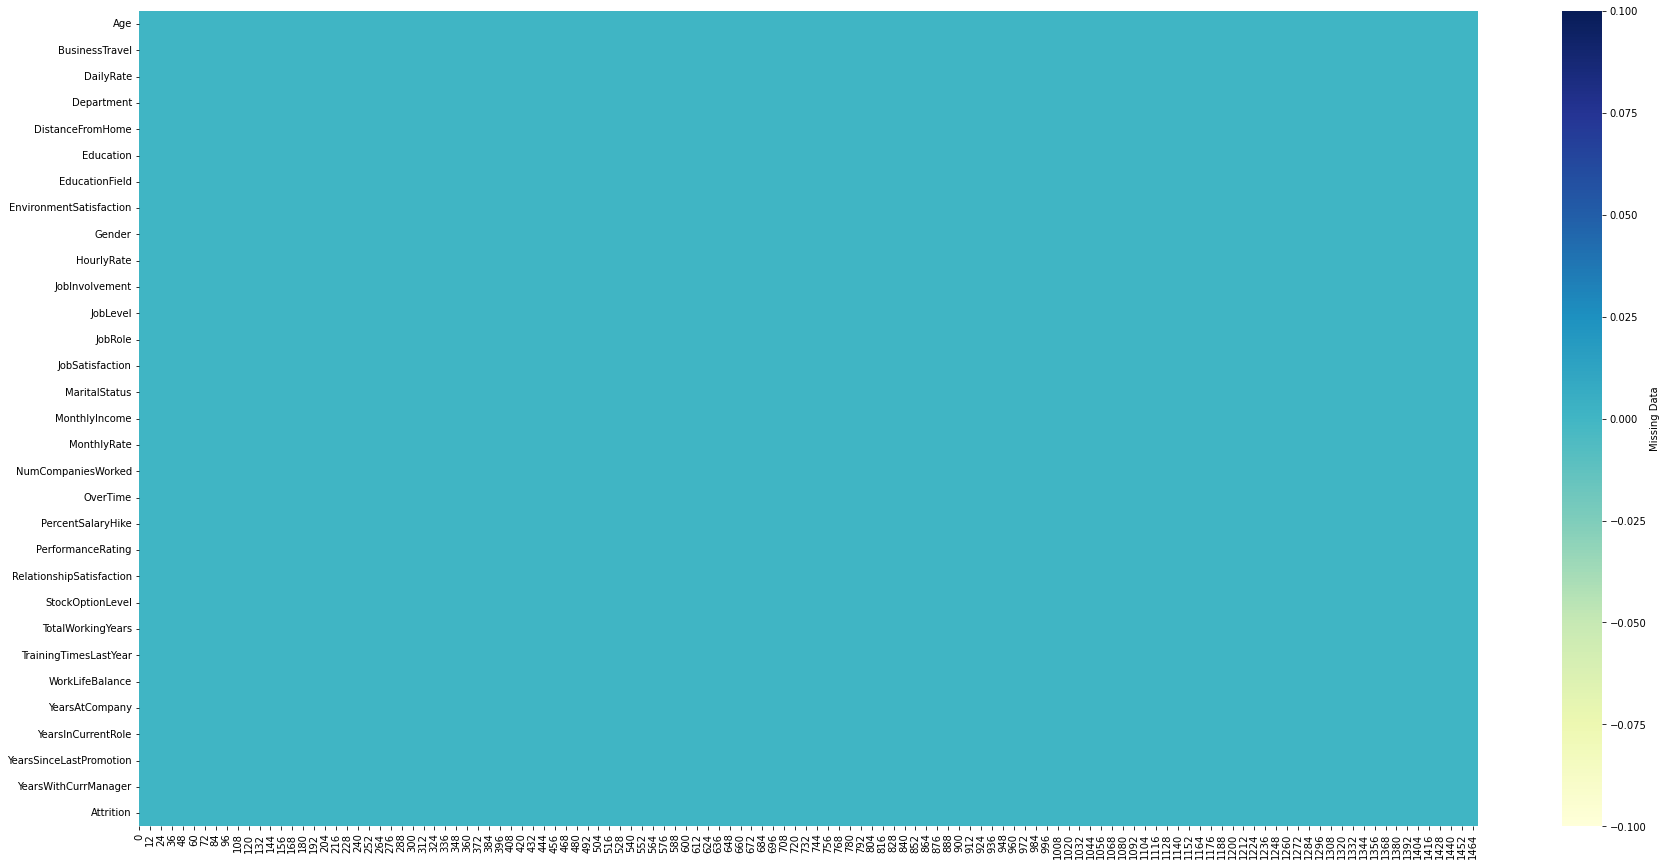

In [ ]:
#Checking missing values
plt.figure(figsize=(30,15))
sns.heatmap(ibmhdt_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [ ]:
#Missing data imputation - Not needed here (see above MD graph -> 0 missing data)

In [ ]:
#Separating differently encoded variables
float_features_i = ibmhdt_df.loc[:, ["Age","DailyRate","DistanceFromHome","Education","EnvironmentSatisfaction","HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]] #int
dummy_features_i = ibmhdt_df.loc[:, ["Gender","OverTime","PerformanceRating","Attrition","Department","EducationField","JobRole", "BusinessTravel","MaritalStatus"]] #dummy

In [ ]:
#Encoding features

dummy_features_i = pd.concat([pd.get_dummies(dummy_features_i['Gender'], prefix='Gender').iloc[:,0],pd.get_dummies(dummy_features_i['OverTime'], prefix='OverTime').iloc[:,0],pd.get_dummies(dummy_features_i['PerformanceRating'], prefix='PerformanceRating').iloc[:,0],pd.get_dummies(dummy_features_i['Attrition'], prefix='Attrition').iloc[:,0], pd.get_dummies(dummy_features_i['Department'], prefix='Department').iloc[:,0:2], pd.get_dummies(dummy_features_i['EducationField'], prefix='EducationField').iloc[:,0:5], pd.get_dummies(dummy_features_i['JobRole'], prefix='JobRole').iloc[:,0:8], pd.get_dummies(dummy_features_i['BusinessTravel'], prefix='BusinessTravel').iloc[:,0:2], pd.get_dummies(dummy_features_i['MaritalStatus'], prefix='MaritalStatus').iloc[:,0:2]], axis=1)

In [ ]:
#Concat all subdfs into 1 !!!

concated_df_i = pd.concat([float_features_i, dummy_features_i], axis=1)

In [ ]:
concated_df_i.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_Female', 'OverTime_No',
       'PerformanceRating_3', 'Attrition_No', 'Department_Human Resources',
       'Department_Research & Development', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Res

In [ ]:
concated_df_i = concated_df_i.loc[:,['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_Female', 'OverTime_No',
       'PerformanceRating_3', 'Department_Human Resources',
       'Department_Research & Development', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'MaritalStatus_Divorced', 'MaritalStatus_Married', 'Attrition_No']]

In [ ]:
#Checking data distributions
import seaborn as sns

sns.pairplot(concated_df_i)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Target imbalance description:
concated_df_i["Attrition_No"].value_counts()/concated_df_i["Attrition_No"].count()

1    0.838776
0    0.161224
Name: Attrition_No, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap of I')

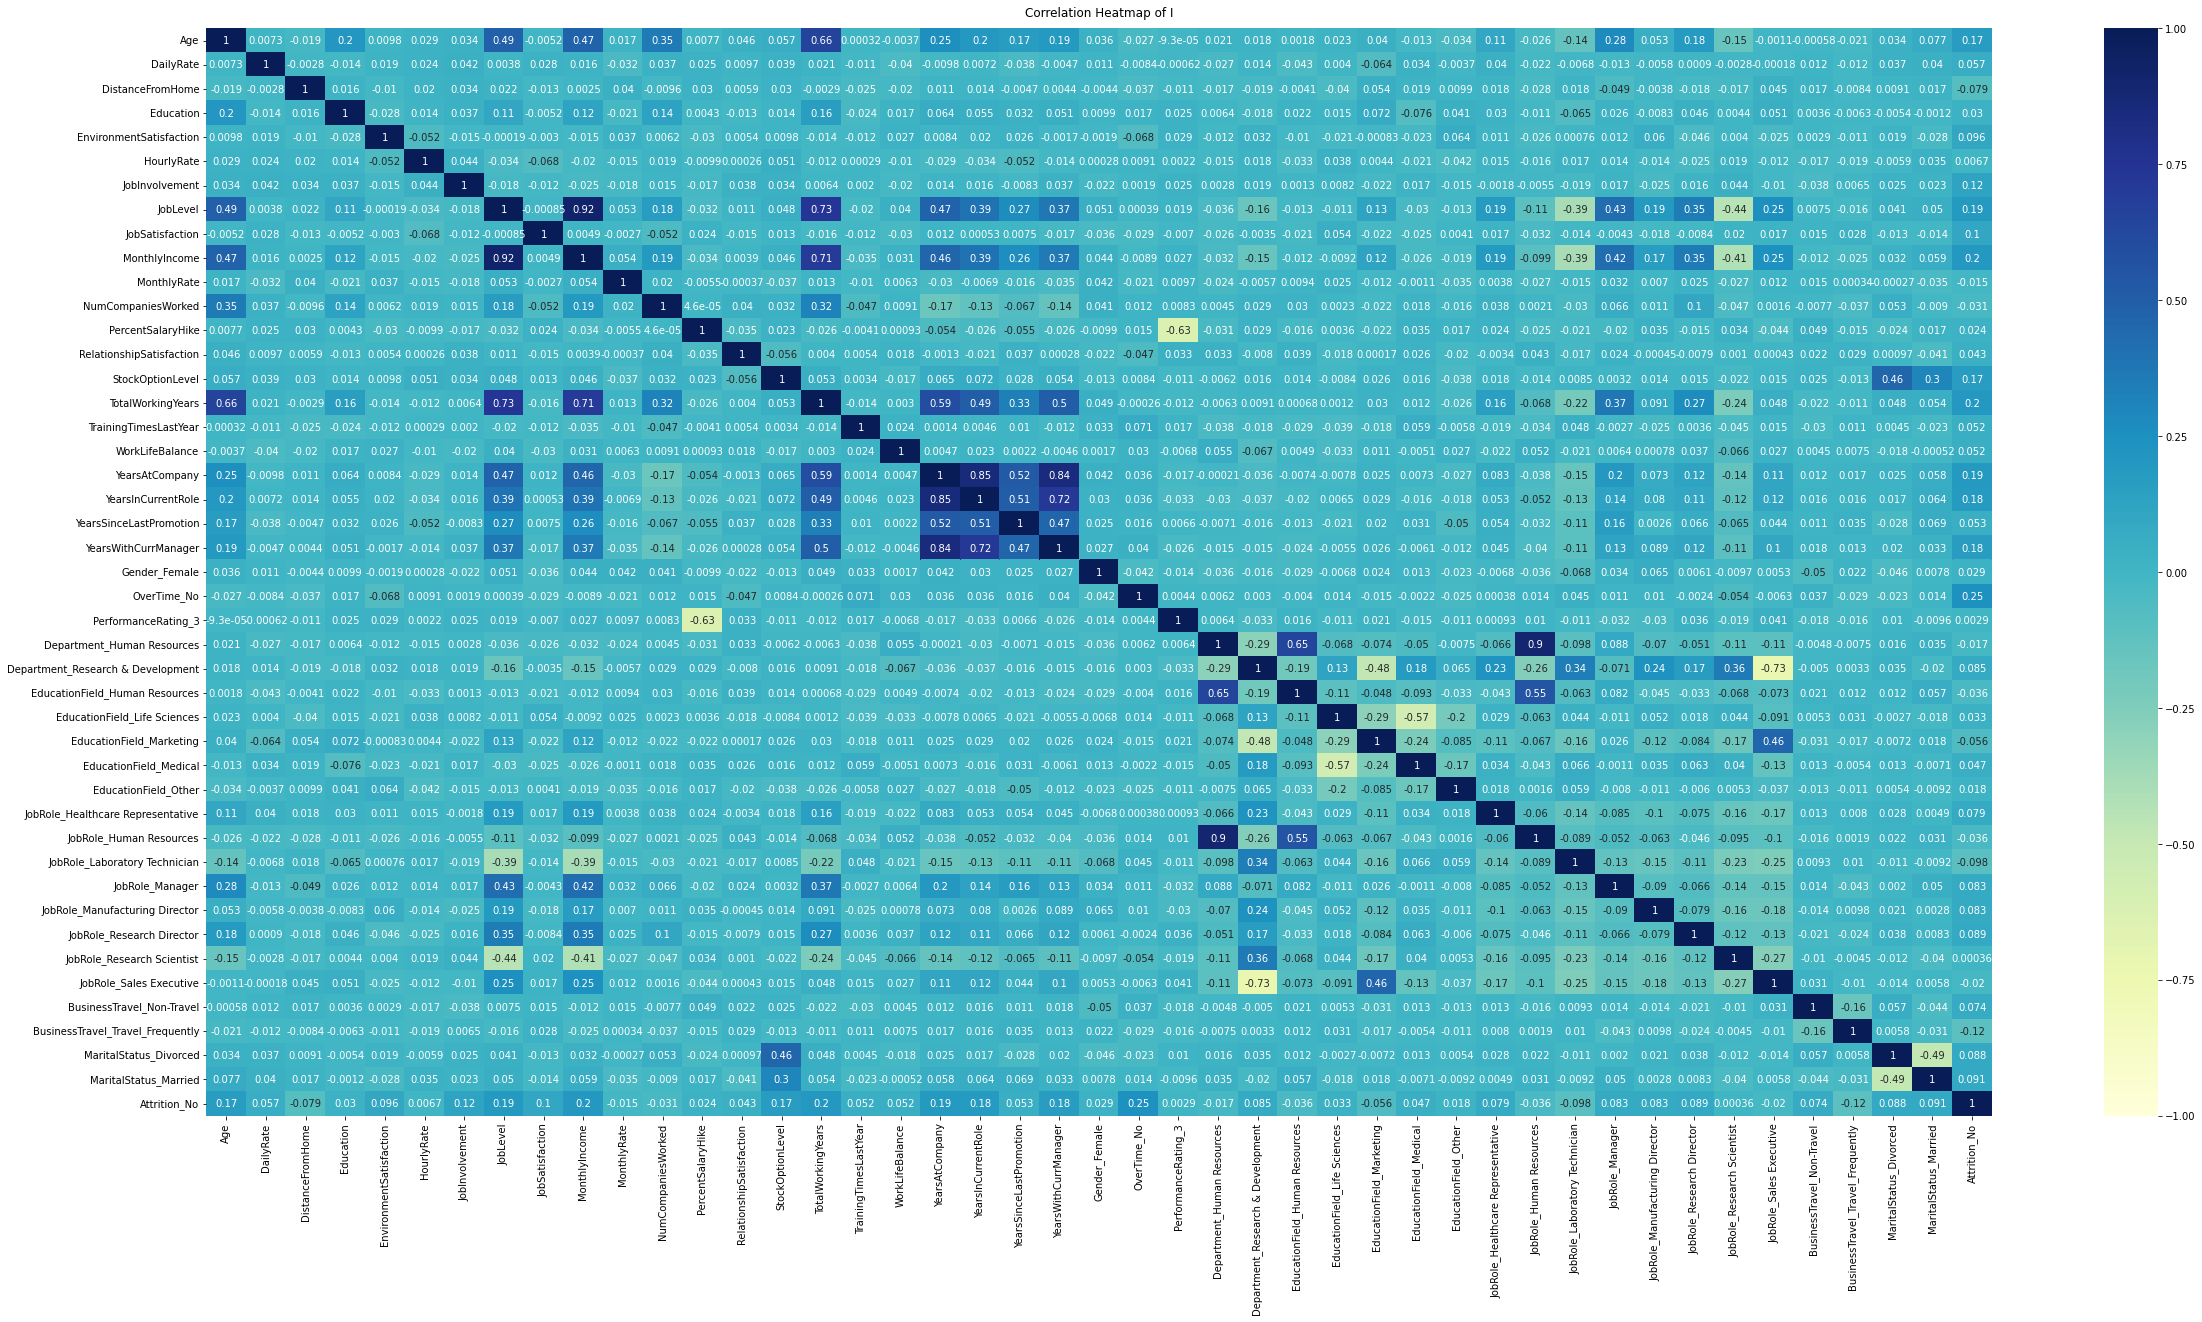

In [ ]:
#Checking correlation of data
#Source: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))

heatmap_i = sns.heatmap(concated_df_i.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

heatmap_i.set_title('Correlation Heatmap of I', fontdict={'fontsize':12}, pad=12)

In [ ]:
#Log scaling not normal feature data distributions

import numpy as np

concated_df_i.loc[:,["Age", "DailyRate", "DistanceFromHome", "Education", "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]]+=1
concated_log_df_i = np.log(concated_df_i.loc[:,["Age", "DailyRate", "DistanceFromHome", "Education", "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]])
concated_df_i = concated_df_i.drop(["Age", "DailyRate", "DistanceFromHome", "Education", "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"], axis = 1)

In [ ]:
#Splitting data and Standardizing features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

concated_df_i = pd.concat([concated_log_df_i, concated_df_i], axis=1)
X_i = concated_df_i.iloc[:,:-1]
y_i = concated_df_i.iloc[:,-1]

X_train_i, X_valid_i, y_train_i, y_valid_i = train_test_split(X_i, y_i, test_size=0.33, random_state=0)

In [ ]:
#Preparing data for lazyprediction - (0.33 valid and 0.67 train)

#!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_i, X_valid_i, y_train_i, y_valid_i)

print(models)

100%|██████████| 29/29 [00:02<00:00, 11.73it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.84               0.74     0.74      0.85   
LogisticRegression                 0.90               0.73     0.73      0.89   
NearestCentroid                    0.72               0.72     0.72      0.75   
Perceptron                         0.84               0.71     0.71      0.84   
LinearDiscriminantAnalysis         0.89               0.71     0.71      0.87   
PassiveAggressiveClassifier        0.82               0.70     0.70      0.82   
GaussianNB                         0.69               0.70     0.70      0.73   
LinearSVC                          0.89               0.70     0.70      0.87   
BernoulliNB                        0.78               0.67     0.67      0.80   
AdaBoostClassifier                 0.87               0.67     0.67      0.85   
CalibratedClassifierCV      

In [ ]:
###Installing libraries
!pip install pytorch_tabnet

###Importing libraries and setting seed
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import json
import os


np.random.seed(0)

In [ ]:
###Training the model for clf (Tabnet) object
from pytorch_tabnet.metrics import Metric
from sklearn.metrics import f1_score

class F1_score(Metric):
    def __init__(self):
        self._name = "f1_score"
        self._maximize = True

    def __call__(self, y_true, y_score):
        y_score = np.where(y_score > 0.5, 1, 0)
        y_score = y_score[:,1]
        return f1_score(y_true, y_score, average="weighted")

n_total_train = len(X_i)

train_indices_i_tb, valid_indices_i_tb = train_test_split(range(n_total_train), test_size=0.33, random_state=0)


clf = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    cat_emb_dim=1,
    lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

X_train_i_tb = X_i.values[train_indices_i_tb]
y_train_i_tb = y_i.values[train_indices_i_tb]

X_valid_i_tb = X_i.values[valid_indices_i_tb]
y_valid_i_tb = y_i.values[valid_indices_i_tb]

sc = StandardScaler()
X_train_i_tb = sc.fit_transform(X_train_i_tb)
X_valid_i_tb = sc.transform(X_valid_i_tb)

max_epochs = 100

clf.fit(
    X_train=X_train_i_tb, y_train=y_train_i_tb,
    eval_set=[(X_train_i_tb, y_train_i_tb), (X_valid_i_tb, y_valid_i_tb)],
    eval_name=['train', 'valid'],
    eval_metric=[F1_score],
    max_epochs=max_epochs, patience=100,
    batch_size=64, virtual_batch_size=64
)

Device used : cuda
epoch 0  | loss: 0.96429 | train_f1_score: 0.78661 | valid_f1_score: 0.77761 |  0:00:00s
epoch 1  | loss: 0.71777 | train_f1_score: 0.7762  | valid_f1_score: 0.77778 |  0:00:01s
epoch 2  | loss: 0.54214 | train_f1_score: 0.77341 | valid_f1_score: 0.76828 |  0:00:02s
epoch 3  | loss: 0.50651 | train_f1_score: 0.79088 | valid_f1_score: 0.81304 |  0:00:03s
epoch 4  | loss: 0.47739 | train_f1_score: 0.80126 | valid_f1_score: 0.77599 |  0:00:04s
epoch 5  | loss: 0.43427 | train_f1_score: 0.80628 | valid_f1_score: 0.78796 |  0:00:05s
epoch 6  | loss: 0.41676 | train_f1_score: 0.82242 | valid_f1_score: 0.79919 |  0:00:06s
epoch 7  | loss: 0.3974  | train_f1_score: 0.80769 | valid_f1_score: 0.80396 |  0:00:07s
epoch 8  | loss: 0.41267 | train_f1_score: 0.7916  | valid_f1_score: 0.78762 |  0:00:07s
epoch 9  | loss: 0.41374 | train_f1_score: 0.78607 | valid_f1_score: 0.76974 |  0:00:08s
epoch 10 | loss: 0.40808 | train_f1_score: 0.80465 | valid_f1_score: 0.78806 |  0:00:09s
ep

#HRA dt

In [ ]:
#View the data
hradt_df.head()

city  city_development_index gender      relevant_experience  \
0  city_103                   0.920   Male  Has relevent experience   
1   city_40                   0.776   Male   No relevent experience   
2   city_21                   0.624    NaN   No relevent experience   
3  city_115                   0.789    NaN   No relevent experience   
4  city_162                   0.767   Male  Has relevent experience   

  enrolled_university education_level major_discipline experience  \
0       no_enrollment        Graduate             STEM        >20   
1       no_enrollment        Graduate             STEM         15   
2    Full time course        Graduate             STEM          5   
3                 NaN        Graduate  Business Degree         <1   
4       no_enrollment         Masters             STEM        >20   

  company_size    company_type last_new_job  training_hours  target  
0          NaN             NaN            1              36       1  
1        50-99         Pvt Ltd           >4              47       0  
2          NaN             NaN        never              83       0  
3          NaN         Pvt Ltd        never              52       1  
4        50-99  Funded Startup            4               8       0

In [ ]:
#Checking datatypes
hradt_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevant_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


In [ ]:
#Checking descriptive statistics
hradt_df.describe()

city_development_index  training_hours        target
count            19158.000000    19158.000000  19158.000000
mean                 0.828848       65.366896      0.249348
std                  0.123362       60.058462      0.432647
min                  0.448000        1.000000      0.000000
25%                  0.740000       23.000000      0.000000
50%                  0.903000       47.000000      0.000000
75%                  0.920000       88.000000      0.000000
max                  0.949000      336.000000      1.000000

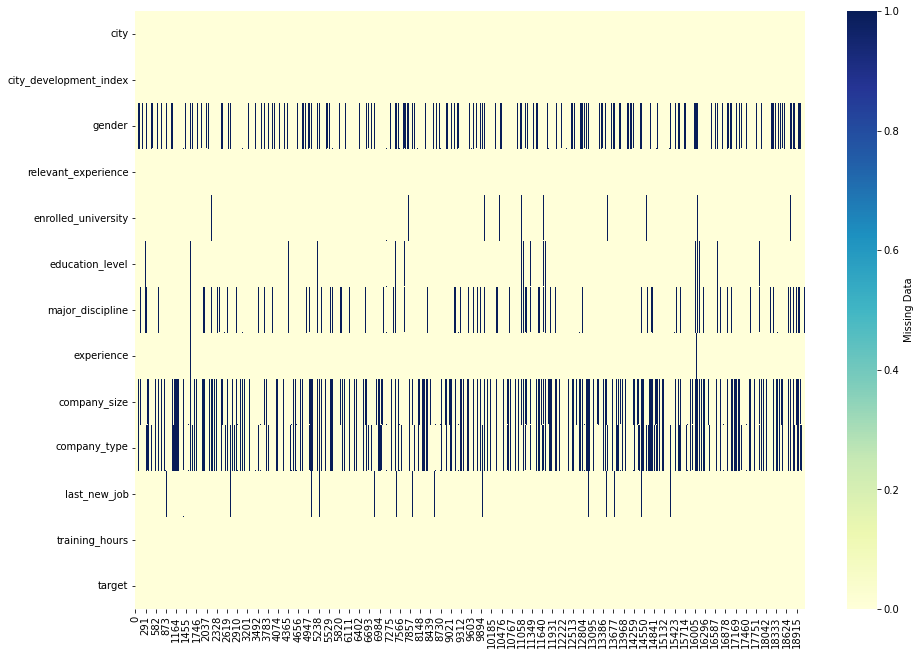

In [ ]:
#Checking missing values
plt.figure(figsize=(15,11))
sns.heatmap(hradt_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [ ]:
#Ratio of Missing Data per features
hradt_df.isna().sum()/len(hradt_df)*100

city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevant_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [ ]:
#Separating differently encoded variables
float_features_h = hradt_df.loc[:, ["city_development_index", "training_hours"]] #numeric
dummy_features_h = hradt_df.loc[:, ["relevant_experience","city"]] #dummy
label_features_h = hradt_df.loc[:, ["enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job", "gender"]]
target_variable_h = hradt_df.loc[:, ["target"]] #target variable
target_variable_h = target_variable_h.replace({"target": {1: 0, 0: 1}})

In [ ]:
#LabelEncoder with memory
#Source: https://python.tutorialink.com/how-to-reverse-label-encoder-from-sklearn-for-multiple-columns/
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        from sklearn.preprocessing import LabelEncoder
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output

In [ ]:
#Encoding features
multi = MultiColumnLabelEncoder(columns=["enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job", "gender"])

label_features_h = label_features_h.values.astype(str)
label_features_h = pd.DataFrame(label_features_h, columns=["enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job", "gender"])
label_features_h = multi.fit_transform(label_features_h)

dummy_features_h = pd.concat([pd.get_dummies(dummy_features_h['relevant_experience'], prefix='relevant_experience').iloc[:,0],pd.get_dummies(dummy_features_h['city'], prefix='city').iloc[:,0:122]],axis=1)

In [ ]:
#Concat all subdfs into 1

concated_df_h = pd.concat([float_features_h, dummy_features_h, label_features_h, target_variable_h], axis=1)

In [ ]:
#Refilling NANs for missing data imputation
import numpy as np
concated_df_h.loc[:, "gender"] = concated_df_h.loc[:, "gender"].replace(3,np.nan)
concated_df_h.loc[:, "enrolled_university"] = concated_df_h.loc[:, "enrolled_university"].replace(2,np.nan)
concated_df_h.loc[:, "education_level"] = concated_df_h.loc[:, "education_level"].replace(5,np.nan)
concated_df_h.loc[:, "major_discipline"] = concated_df_h.loc[:, "major_discipline"].replace(6,np.nan)
concated_df_h.loc[:, "experience"] = concated_df_h.loc[:, "experience"].replace(22,np.nan)
concated_df_h.loc[:, "company_size"] = concated_df_h.loc[:, "company_size"].replace(8,np.nan)
concated_df_h.loc[:, "company_type"] = concated_df_h.loc[:, "company_type"].replace(6,np.nan)
concated_df_h.loc[:, "last_new_job"] = concated_df_h.loc[:, "last_new_job"].replace(5,np.nan)

In [ ]:
#Missing data imputation
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(estimator=ExtraTreesRegressor(), max_iter=3, random_state=0)

concated_df_h.loc[:, :] = imp.fit_transform(concated_df_h)

concated_df_h

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


city_development_index  training_hours  \
0                       0.920            36.0   
1                       0.776            47.0   
2                       0.624            83.0   
3                       0.789            52.0   
4                       0.767             8.0   
...                       ...             ...   
19153                   0.878            42.0   
19154                   0.920            52.0   
19155                   0.920            44.0   
19156                   0.802            97.0   
19157                   0.855           127.0   

       relevant_experience_Has relevent experience  city_city_1  city_city_10  \
0                                              1.0          0.0           0.0   
1                                              0.0          0.0           0.0   
2                                              0.0          0.0           0.0   
3                                              0.0          0.0           0.0   
4                                              1.0          0.0           0.0   
...                                            ...          ...           ...   
19153                                          0.0          0.0           0.0   
19154                                          1.0          0.0           0.0   
19155                                          1.0          0.0           0.0   
19156                                          1.0          0.0           0.0   
19157                                          0.0          0.0           0.0   

       city_city_100  city_city_101  city_city_102  city_city_103  \
0                0.0            0.0            0.0            1.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
19153            0.0            0.0            0.0            0.0   
19154            0.0            0.0            0.0            1.0   
19155            0.0            0.0            0.0            1.0   
19156            0.0            0.0            0.0            0.0   
19157            0.0            0.0            0.0            0.0   

       city_city_104  ...  city_city_98  enrolled_university  education_level  \
0                0.0  ...           0.0                 3.00              0.0   
1                0.0  ...           0.0                 3.00              0.0   
2                0.0  ...           0.0                 0.00              0.0   
3                0.0  ...           0.0                 2.61              0.0   
4                0.0  ...           0.0                 3.00              2.0   
...              ...  ...           ...                  ...              ...   
19153            0.0  ...           0.0                 3.00              0.0   
19154            0.0  ...           0.0                 3.00              0.0   
19155            0.0  ...           0.0                 3.00              0.0   
19156            0.0  ...           0.0                 3.00              1.0   
19157            0.0  ...           0.0                 3.00              4.0   

       major_discipline  experience  company_size  company_type  last_new_job  \
0                  5.00        21.0          2.79          4.73           0.0   
1                  5.00         6.0          4.00          5.00           4.0   
2                  5.00        15.0          1.51          4.94           6.0   
3                  1.00        20.0          1.50          5.00           6.0   
4                  5.00        21.0          4.00          1.00           3.0   
...                 ...         ...           ...           ...           ...   
19153              2.00         5.0          2.42          4.54           0.

In [ ]:
#Round up float values for integer type conversion
j = 0
for i in concated_df_h["enrolled_university"]:
  concated_df_h["enrolled_university"][j] = round(i,0)
  j+=1

k = 0
for l in concated_df_h["gender"]:
  if round(l,0) > 2.0:
    concated_df_h["gender"][k] = 2.0
  else:
    concated_df_h["gender"][k] = round(l,0)
  k+=1

In [ ]:
#Reverse label encode features
label_list = ["enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job", "gender"]
for i in label_list:
  concated_df_h[i] = concated_df_h[i].astype("int")

concated_df_h = multi.inverse_transform(concated_df_h)
concated_df_h

In [ ]:
#Dummy encode the reversed features
import copy
label_list = ["enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job", "gender"]
concated_df_h_2 = copy.deepcopy(concated_df_h)

for i in label_list:
  concated_df_h_2[i] = pd.get_dummies(concated_df_h_2[i], prefix=i).iloc[:,(len(set(concated_df_h_2[i]))-1)]

concated_df_h_2

city_development_index  training_hours  \
0                       0.920            36.0   
1                       0.776            47.0   
2                       0.624            83.0   
3                       0.789            52.0   
4                       0.767             8.0   
...                       ...             ...   
19153                   0.878            42.0   
19154                   0.920            52.0   
19155                   0.920            44.0   
19156                   0.802            97.0   
19157                   0.855           127.0   

       relevant_experience_Has relevent experience  city_city_1  city_city_10  \
0                                              1.0          0.0           0.0   
1                                              0.0          0.0           0.0   
2                                              0.0          0.0           0.0   
3                                              0.0          0.0           0.0   
4                                              1.0          0.0           0.0   
...                                            ...          ...           ...   
19153                                          0.0          0.0           0.0   
19154                                          1.0          0.0           0.0   
19155                                          1.0          0.0           0.0   
19156                                          1.0          0.0           0.0   
19157                                          0.0          0.0           0.0   

       city_city_100  city_city_101  city_city_102  city_city_103  \
0                0.0            0.0            0.0            1.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
19153            0.0            0.0            0.0            0.0   
19154            0.0            0.0            0.0            1.0   
19155            0.0            0.0            0.0            1.0   
19156            0.0            0.0            0.0            0.0   
19157            0.0            0.0            0.0            0.0   

       city_city_104  ...  city_city_98  enrolled_university  education_level  \
0                0.0  ...           0.0                    1                0   
1                0.0  ...           0.0                    1                0   
2                0.0  ...           0.0                    0                0   
3                0.0  ...           0.0                    1                0   
4                0.0  ...           0.0                    1                0   
...              ...  ...           ...                  ...              ...   
19153            0.0  ...           0.0                    1                0   
19154            0.0  ...           0.0                    1                0   
19155            0.0  ...           0.0                    1                0   
19156            0.0  ...           0.0                    1                0   
19157            0.0  ...           0.0                    1                1   

       major_discipline  experience  company_size  company_type  last_new_job  \
0                     1           1             0             0             0   
1                     1           0             0             1             0   
2                     1           0             0             0             1   
3                     0           0             0             1             1   
4                     1           1             0             0             0   
...                 ...         ...           ...           ...           ...   
19153                 0           0             0             0             

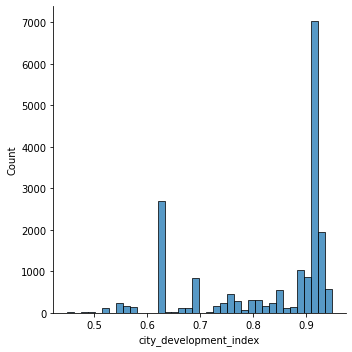

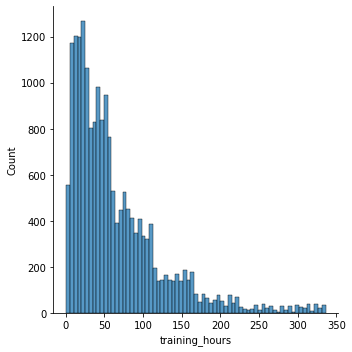

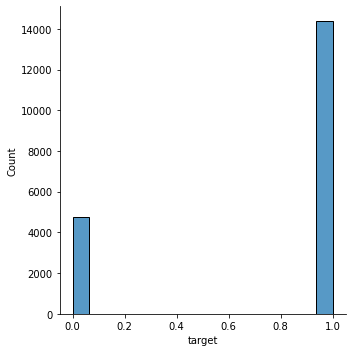

In [ ]:
#Checking data distributions
import seaborn as sns

for i in ["city_development_index", "training_hours", "target"]:
    sns.displot(concated_df_h_2, x=i)

In [ ]:
#Target imbalance description:
concated_df_h_2["target"].value_counts()/concated_df_h_2["target"].count()

1.0    0.750652
0.0    0.249348
Name: target, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap of I')

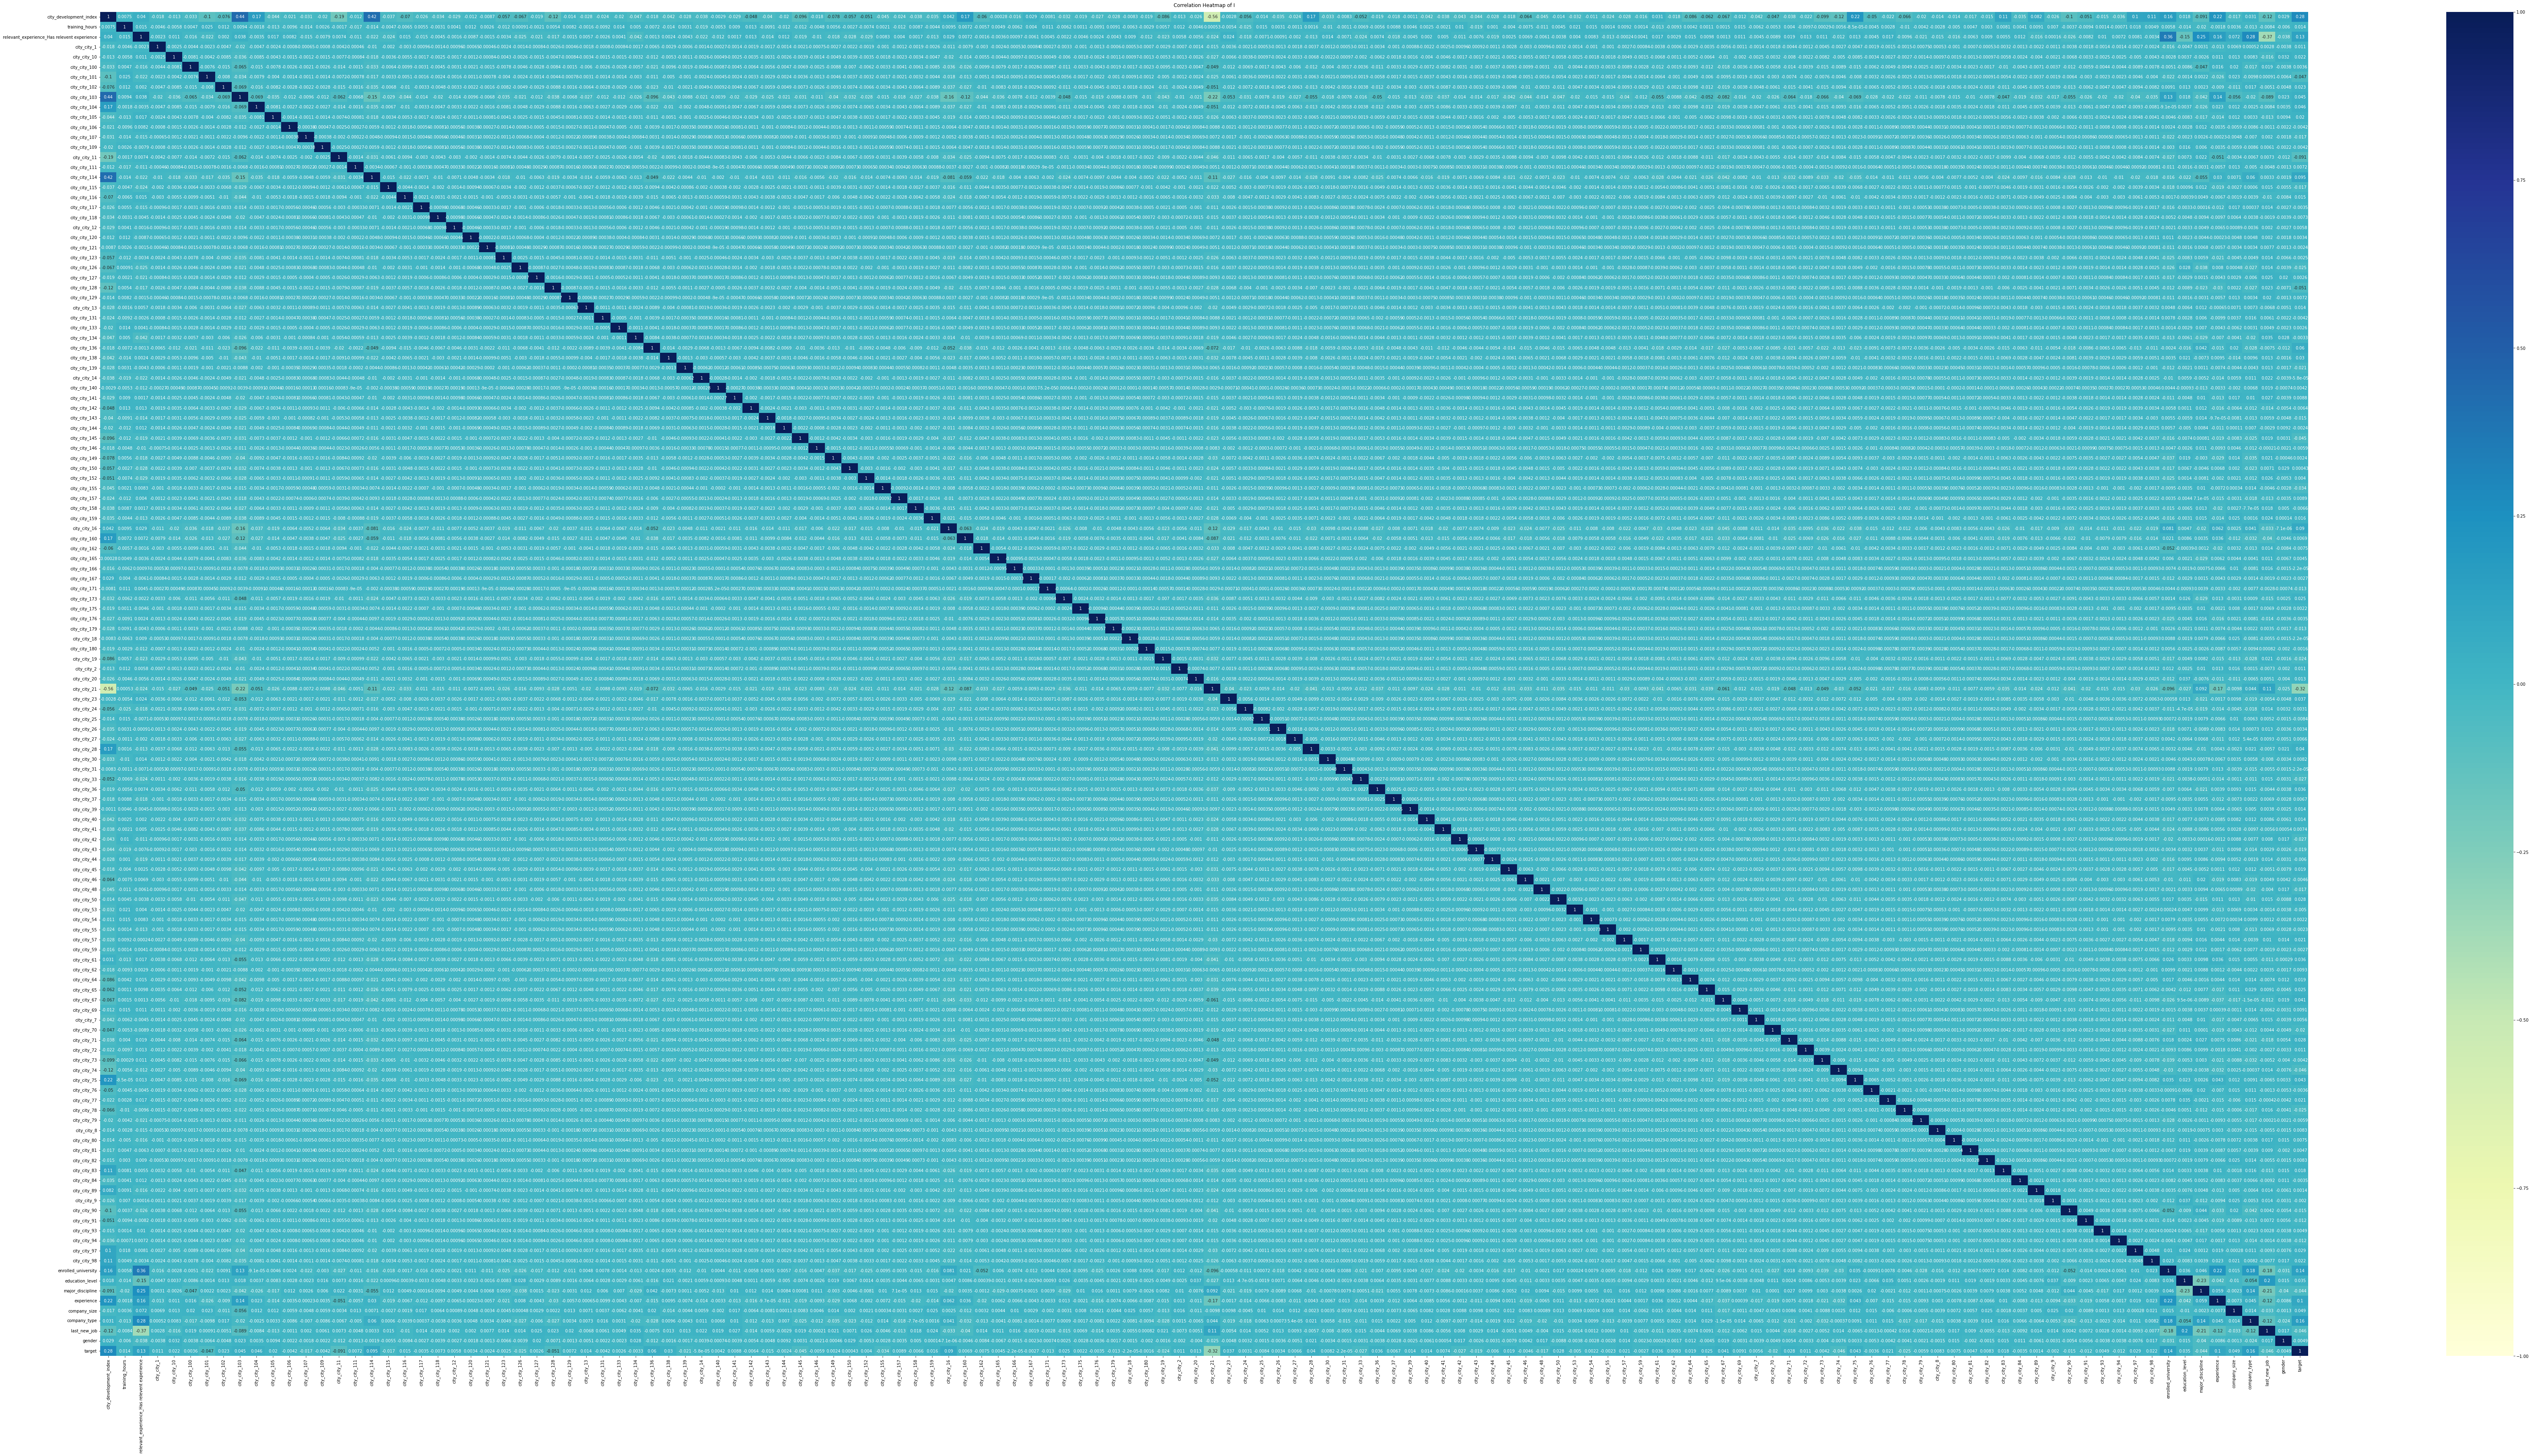

In [ ]:
#Checking correlation of data
#Source: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(120, 60))

heatmap_h = sns.heatmap(concated_df_h_2.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

heatmap_h.set_title('Correlation Heatmap of I', fontdict={'fontsize':12}, pad=12)

In [ ]:
#Log scaling not normal feature data distributions !!! ->modify!

import numpy as np

concated_df_h_2.loc[:,["city_development_index", "training_hours"]]+=1
concated_log_df_h = np.log(concated_df_h_2.loc[:,["city_development_index", "training_hours"]])
concated_df_h_2 = concated_df_h_2.drop(["city_development_index", "training_hours"], axis = 1)

In [ ]:
#Splitting data and Standardizing features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

concated_df_h_2 = pd.concat([concated_log_df_h, concated_df_h_2], axis=1)
X_h = concated_df_h_2.iloc[:,:-1]
y_h = concated_df_h_2.iloc[:,-1]

X_train_h, X_valid_h, y_train_h, y_valid_h = train_test_split(X_h, y_h, test_size=0.33, random_state=0)

In [ ]:
#Preparing data for lazyprediction - (0.33 valid and 0.67 train)

#!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

clf_h = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf_h.fit(X_train_h, X_valid_h, y_train_h, y_valid_h)

print(models)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [01:41<00:00,  3.49s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.75               0.69     0.69      0.75   
BernoulliNB                        0.76               0.67     0.67      0.76   
LGBMClassifier                     0.77               0.66     0.66      0.76   
XGBClassifier                      0.77               0.66     0.66      0.76   
LinearDiscriminantAnalysis         0.77               0.65     0.65      0.76   
SVC                                0.78               0.65     0.65      0.76   
LinearSVC                          0.77               0.65     0.65      0.76   
RidgeClassifier                    0.77               0.64     0.64      0.75   
RidgeClassifierCV                  0.77               0.64     0.64      0.75   
LabelSpreading                     0.74               0.64     0.64      0.73   
LabelPropagation            

In [ ]:
###Installing libraries
!pip install pytorch_tabnet

###Importing libraries and setting seed
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import json
import os


np.random.seed(0)

In [ ]:
###Training the model for clf (Tabnet) object
from pytorch_tabnet.metrics import Metric
from sklearn.metrics import f1_score

class F1_score(Metric):
    def __init__(self):
        self._name = "f1_score"
        self._maximize = True

    def __call__(self, y_true, y_score):
        y_score = np.where(y_score > 0.5, 1, 0)
        y_score = y_score[:,1]
        return f1_score(y_true, y_score, average="weighted")

n_total_train = len(X_h)

train_indices_h, valid_indices_h = train_test_split(range(n_total_train), test_size=0.33, random_state=0)


clf = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    cat_emb_dim=1,
    lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

X_train_h_tb = X_h.values[train_indices_h]
y_train_h_tb = y_h.values[train_indices_h]

X_valid_h_tb = X_h.values[valid_indices_h]
y_valid_h_tb = y_h.values[valid_indices_h]

sc = StandardScaler()
X_train_h_tb = sc.fit_transform(X_train_h_tb)
X_valid_h_tb = sc.transform(X_valid_h_tb)

max_epochs = 100

clf.fit(
    X_train=X_train_h_tb, y_train=y_train_h_tb,
    eval_set=[(X_train_h_tb, y_train_h_tb), (X_valid_h_tb, y_valid_h_tb)],
    eval_name=['train', 'valid'],
    eval_metric=[F1_score],
    max_epochs=max_epochs, patience=100,
    batch_size=64, virtual_batch_size=64
)

Device used : cuda
epoch 0  | loss: 0.67825 | train_f1_score: 0.74669 | valid_f1_score: 0.73668 |  0:00:09s
epoch 1  | loss: 0.52208 | train_f1_score: 0.75922 | valid_f1_score: 0.74856 |  0:00:19s
epoch 2  | loss: 0.50693 | train_f1_score: 0.64577 | valid_f1_score: 0.63961 |  0:00:29s
epoch 3  | loss: 0.49904 | train_f1_score: 0.75868 | valid_f1_score: 0.74869 |  0:00:39s
epoch 4  | loss: 0.48198 | train_f1_score: 0.76092 | valid_f1_score: 0.75252 |  0:00:49s
epoch 5  | loss: 0.48124 | train_f1_score: 0.7702  | valid_f1_score: 0.75711 |  0:00:59s
epoch 6  | loss: 0.47252 | train_f1_score: 0.76405 | valid_f1_score: 0.75326 |  0:01:09s
epoch 7  | loss: 0.47164 | train_f1_score: 0.74037 | valid_f1_score: 0.7336  |  0:01:18s
epoch 8  | loss: 0.46524 | train_f1_score: 0.7666  | valid_f1_score: 0.75555 |  0:01:28s
epoch 9  | loss: 0.47232 | train_f1_score: 0.76849 | valid_f1_score: 0.75628 |  0:01:38s
epoch 10 | loss: 0.46794 | train_f1_score: 0.77279 | valid_f1_score: 0.75883 |  0:01:48s
ep